**Sheth L.U.J. & Sir M.V. College Of Arts, Science & Commerce**

**Shobit Halse | T083**

**Practical No. 6**

**Aim:** Regression and Its Types
* Implement simple linear regression using a dataset.
* Explore and interpret the regression model coefficients and goodness-of-fit
measures.
* Extend the analysis to multiple linear regression and assess the impact of
additional predictors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

**Load the dataset**

In [2]:
df_sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Data analysis**


In [3]:
df_sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df_sleep.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

**Data Distribution Plot**

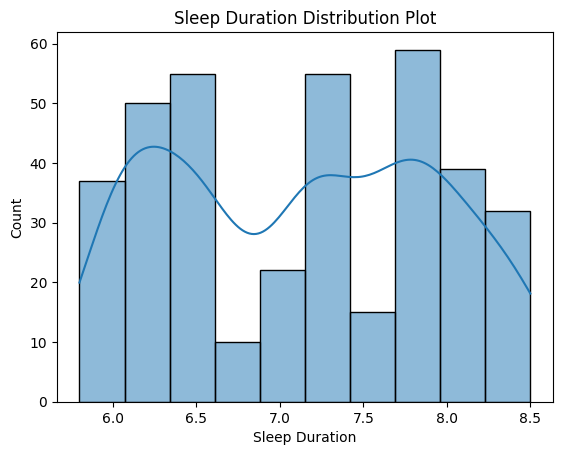

In [6]:
# Data distribution
plt.title('Sleep Duration Distribution Plot')
sns.histplot(df_sleep['Sleep Duration'], kde=True)
plt.show()

**Visualize the data**

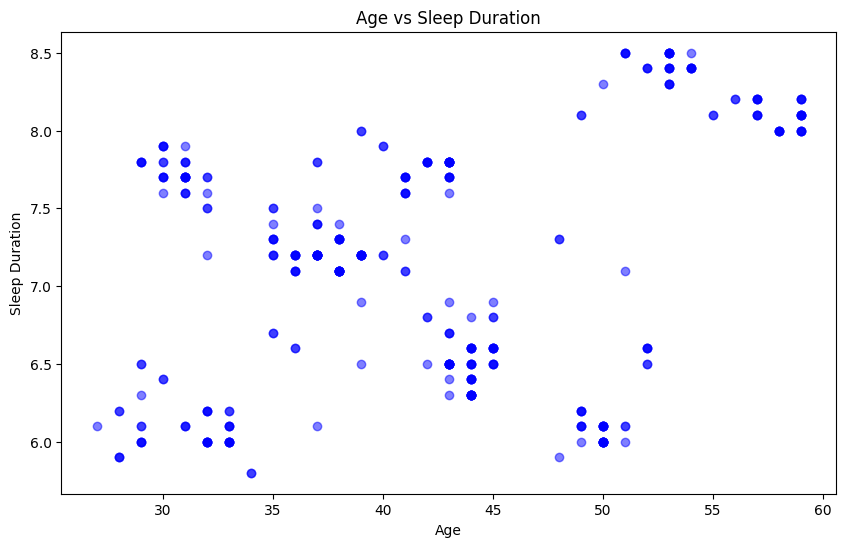

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sleep['Age'], df_sleep['Sleep Duration'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Age vs Sleep Duration')
plt.show()

**Prepare the data for Linear Regression**

In [8]:
X = df_sleep[['Age']]
y = df_sleep['Sleep Duration']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Linear Regression Model**

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
print('Coefficient (Slope):', model.coef_[0])
print('Intercept:', model.intercept_)

Coefficient (Slope): 0.030215721917932977
Intercept: 5.871362245937792


**Make Predictions**

In [12]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

**Evaluate the Model**

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Squared Error: 0.5721919649626545
Root Mean Squared Error: 0.7564337148505839
Mean Absolute Error: 0.6891997633114224
R-squared Score: 0.14055696111175242


**Visualize the Regression Line (Training Set)**

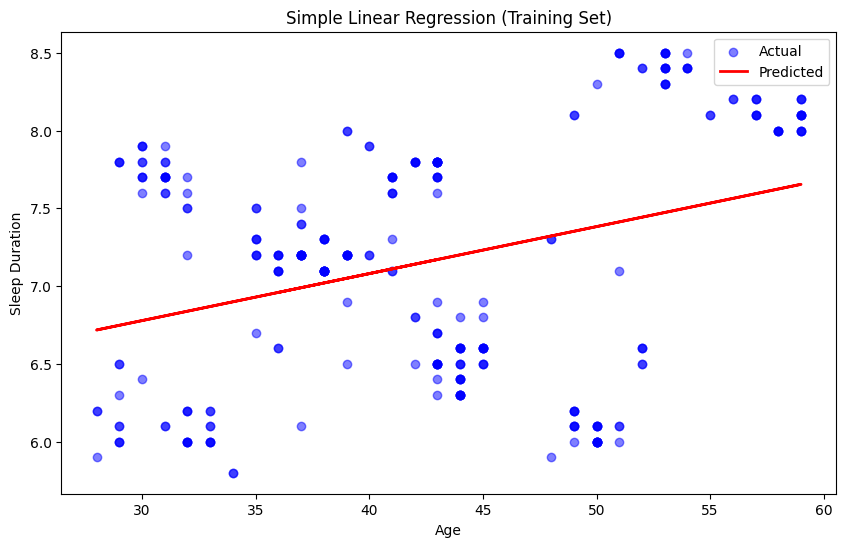

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Actual')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Simple Linear Regression (Training Set)')
plt.legend()
plt.show()

**Visualize the Regression Line (Test Set)**

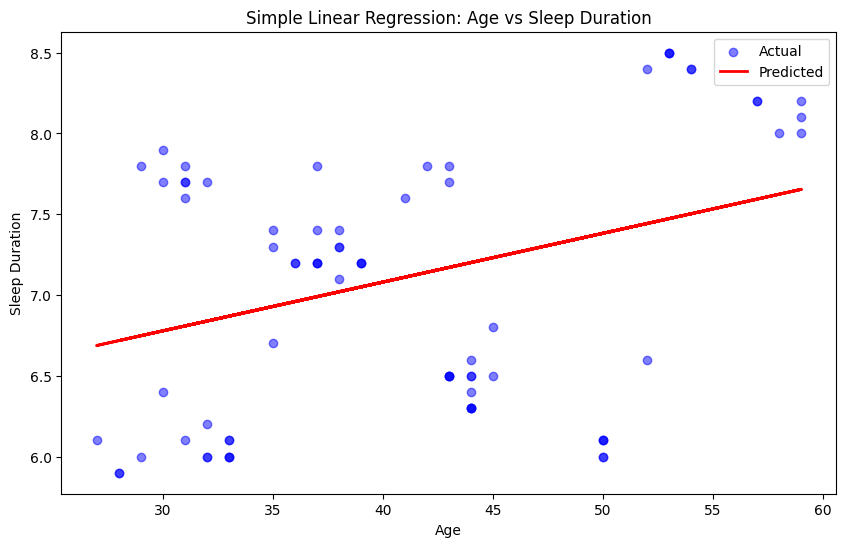

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Simple Linear Regression: Age vs Sleep Duration')
plt.legend()
plt.show()

**Predict Sleep Duration for a given Age**

In [16]:
new_age = [[35]]
predicted_sleep = model.predict(new_age)
print(f'Predicted Sleep Duration for Age 35: {predicted_sleep[0]:.2f} hours')

Predicted Sleep Duration for Age 35: 6.93 hours


c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
